In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

In [2]:
train = pd.read_csv("train.csv")
teste = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
teste.shape

(418, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
teste.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


Verificando se existem linhas duplicadas ou dados faltantes no dataset

In [11]:
train.duplicated().sum()

0

In [12]:
teste.duplicated().sum()

0

In [13]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [14]:
teste.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

Verificando a distribuição da variável "Age". 

Text(0, 0.5, 'Frequência')

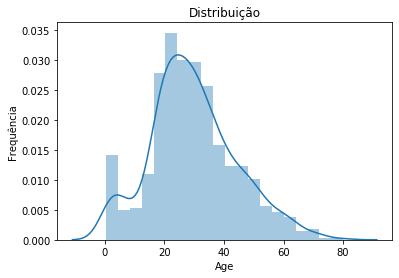

In [15]:
fig=sns.distplot(train.Age)
fig.set_title("Distribuição")
fig.set_ylabel("Frequência")

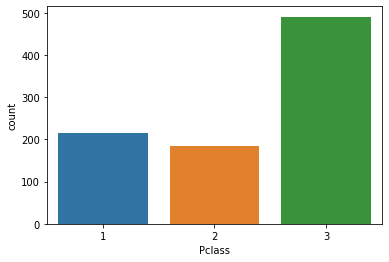

In [16]:
sns.countplot(x="Pclass", data=train)

In [17]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

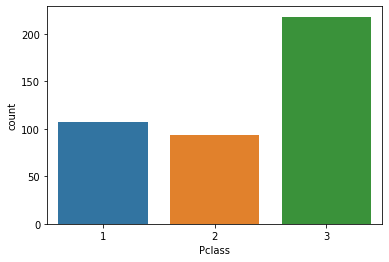

In [18]:
sns.countplot(x="Pclass", data=teste)

In [19]:
teste.Pclass.value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

Text(0.5, 0, 'número de acompanhantes')

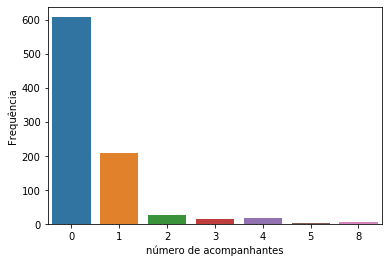

In [20]:
sns.countplot(x="SibSp", data=train)
plt.ylabel("Frequência")
plt.xlabel("número de acompanhantes")

Text(0.5, 0, 'Número de acompanhantes')

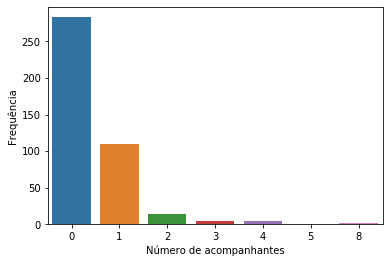

In [21]:
sns.countplot(x="SibSp", data=teste)
plt.ylabel("Frequência")
plt.xlabel("Número de acompanhantes")

Existe uma disparidade muito grande dos números de passageiros da 3°classe e que viajaram sozinho ou com uma pessoa, porém depois na hora de entregar para o algoritomo de machine learning iremos fazer a padronização.

Verificando os outliers na coluna "Age".

Text(0.5, 0, 'Local de Embarque')

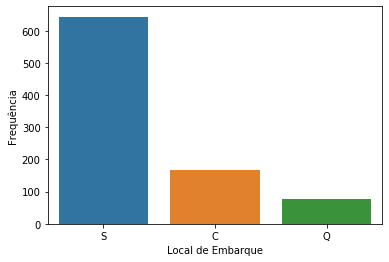

In [22]:
sns.countplot(x="Embarked", data=train)
plt.ylabel("Frequência")
plt.xlabel("Local de Embarque")

Text(0.5, 0, 'Local de Embarque')

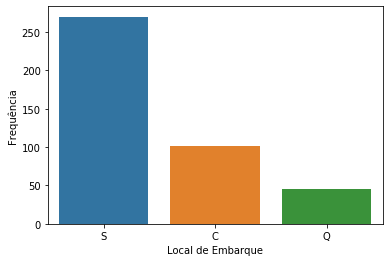

In [23]:
sns.countplot(x="Embarked", data=teste, order=["S","C","Q"])
plt.ylabel("Frequência")
plt.xlabel("Local de Embarque")

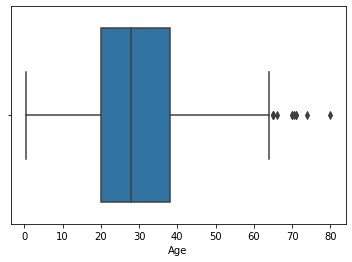

In [24]:
sns.boxplot(train.Age)

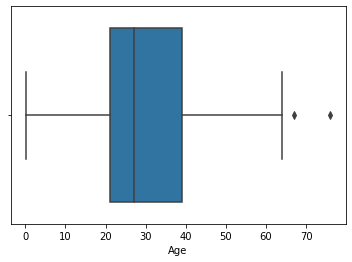

In [25]:
sns.boxplot(teste.Age)

Existem alguns outliers na coluna "age". Tudo que for acima de duas vezes e meia o desvio padrão a partir da média eu irei retirar. 

In [26]:
media = train.Age.mean()
desv = train.Age.std()

In [27]:
limite_sup = media +(2.5*desv)

In [28]:
limite_sup

66.01536097789392

In [29]:
train.query("Age>=66")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [30]:
train.drop([33,96,116,493,630,672,745,851], inplace=True)

In [31]:
teste.query("Age>=66")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [32]:
train.groupby("Pclass")["Age"].mean()

Pclass
1    37.469341
2    29.431754
3    24.873711
Name: Age, dtype: float64

In [33]:
def imputar_idade(coluna):
    idade = coluna[0]
    classe = coluna[1]
    
    if pd.isnull(idade):
        if classe == 1:
            return 38
        elif classe ==2:
            return 29
        else:
            return 25
    else:
        return idade

In [34]:
train.Age = train[["Age", "Pclass"]].apply(imputar_idade, axis=1)

In [35]:
teste.Age = teste[["Age", "Pclass"]].apply(imputar_idade, axis=1)

In [36]:
train['cabine'] = train.Cabin.str[0].str.lower().str.strip()
teste['cabine'] = teste.Cabin.str[0].str.lower().str.strip()

In [37]:
classe1 = ["a", "b", "c", "d", "e"]
classe2 = ["d", "e", "f"]
classe3 = ["e", "f", "g"]

In [38]:
def imputar_cabine(coluna):
    cabine = coluna[0]
    classe = coluna[1]
    
    if pd.isnull(cabine):
        if classe == 1:
            return np.random.choice(classe1)
        elif classe ==2:
            return np.random.choice(classe2)
        else:
            return np.random.choice(classe3)
    else:
        return cabine

In [39]:
train.cabine = train[["cabine", "Pclass"]].apply(imputar_cabine, axis=1)

In [40]:
teste.cabine = teste[["cabine", "Pclass"]].apply(imputar_cabine, axis=1)

In [41]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabine
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,f
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,f
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,d
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,e
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,g


In [42]:
def sobrevivencia(coluna):
    sexo = coluna[0]
    idade = coluna[1]
    if sexo == "male" and idade <=12:
        return 1
    if sexo == "female":
        return 1
    else:
        return 0

In [43]:
train['sobrevivencia'] = train[["Sex", "Age"]].apply(sobrevivencia, axis=1)
teste['sobrevivencia'] = teste[["Sex", "Age"]].apply(sobrevivencia, axis=1)

Quero entender a variavel "Fare" e como ela se relaciona com a Classe Social

In [44]:
dinheiro_classe3 = train.query("Pclass == 3")
print ("Preço maximo da terceira classe",max(dinheiro_classe3["Fare"]))
print ("Preço minimo da terceira classe",min(dinheiro_classe3["Fare"]))
print("Valor médio da terceira classe", dinheiro_classe3["Fare"].mean())
dinheiro_classe2 = train.query("Pclass == 2")
print ("Preço maximo da segunda classe",max(dinheiro_classe2["Fare"]))
print ("Preço minimo da segunda classe",min(dinheiro_classe2["Fare"]))
print("Valor médio da segunda classe", dinheiro_classe2["Fare"].mean())
dinheiro_classe1 = train.query("Pclass == 1")
print ("Preço maximo da primeira classe",max(dinheiro_classe1["Fare"]))
print ("Preço minimo da primeira classe",min(dinheiro_classe1["Fare"]))
print("Valor médio da primeira classe", dinheiro_classe1["Fare"].mean())

Preço maximo da terceira classe 69.55
Preço minimo da terceira classe 0.0
Valor médio da terceira classe 13.699734355828227
Preço maximo da segunda classe 73.5
Preço minimo da segunda classe 0.0
Valor médio da segunda classe 20.77385549450549
Preço maximo da primeira classe 512.3292
Preço minimo da primeira classe 0.0
Valor médio da primeira classe 84.86912311320746


Text(0.5, 1.0, 'Distribuição de pagamentos da 3 classe')

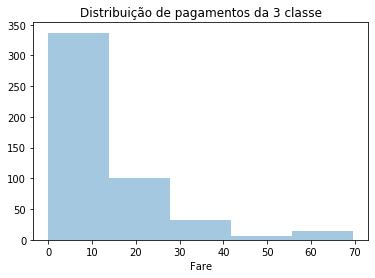

In [45]:
fig1 = sns.distplot(dinheiro_classe3.Fare, kde=False, bins=5)
fig1.set_title("Distribuição de pagamentos da 3 classe")

A Grande maioria da terceira classe pagou entre 0 e 10 dolares.

Text(0.5, 1.0, 'Distribuição de pagamentos da 2 classe')

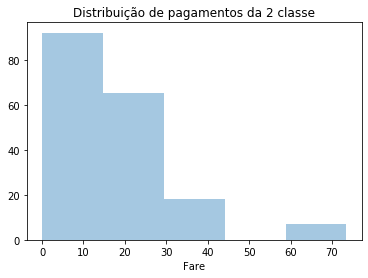

In [46]:
fig2 = sns.distplot(dinheiro_classe2.Fare, kde=False, bins=5)
fig2.set_title("Distribuição de pagamentos da 2 classe")

Text(0.5, 1.0, 'Distribuição de pagamentos da 1 classe')

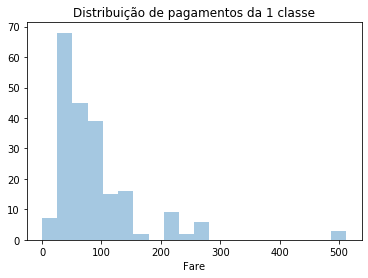

In [47]:
fig3 = sns.distplot(dinheiro_classe1.Fare, kde = False, bins=20)
fig3.set_title("Distribuição de pagamentos da 1 classe")

In [48]:
train = train.drop(['Name', 'Cabin','PassengerId', 'Ticket'],axis=1)

In [49]:
train.isnull().sum().sort_values(ascending=False)

Embarked         2
sobrevivencia    0
cabine           0
Fare             0
Parch            0
SibSp            0
Age              0
Sex              0
Pclass           0
Survived         0
dtype: int64

In [50]:
teste = teste.drop(['Name', 'Cabin','PassengerId', 'Ticket'],axis=1)

In [51]:
teste.isnull().sum().sort_values(ascending=False)

Fare             1
sobrevivencia    0
cabine           0
Embarked         0
Parch            0
SibSp            0
Age              0
Sex              0
Pclass           0
dtype: int64

In [52]:
train['Embarked'].value_counts()

S    639
C    166
Q     76
Name: Embarked, dtype: int64

In [53]:
train.Embarked[train.Embarked.isnull()]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [54]:
train.loc[[61, 829],:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabine,sobrevivencia
61,1,1,female,38.0,0,0,80.0,NaN,b,1
829,1,1,female,62.0,0,0,80.0,NaN,b,1


As duas pessoas que não sabemos qual o local de embarque estão na mesma cabine, resolvi pesquisar um pouco sobre essas duas mulheres.

Em uma perquisa rapida no Google verifiquei que a Srta Amelie Icard era empregada da Sra Stone. As duas embarcaram em Southampton e foram resgatadas pela Carpathia no bote salva-vidas 6.

In [55]:
train['Embarked'].fillna("S", inplace=True)

In [56]:
teste.Fare[teste.Fare.isnull()]

152   NaN
Name: Fare, dtype: float64

In [57]:
teste.loc[[152,151],:]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabine,sobrevivencia
152,3,male,60.5,0,0,NaN,S,g,0
151,3,male,25.0,0,0,7.8958,C,f,0


In [58]:
teste.groupby("Pclass")["Fare"].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [59]:
teste['Fare'].fillna(12.4596, inplace=True)

In [60]:
train = pd.get_dummies(train, prefix=['Sex', 'Embarked', 'cabine'])

In [61]:
teste = pd.get_dummies(teste, prefix=['Sex', 'Embarked', 'cabine'])

In [62]:
train.drop(["cabine_t", "Age", ], axis = 1, inplace=True)

In [63]:
X = train.drop("Survived", axis = 1)
y = train["Survived"]

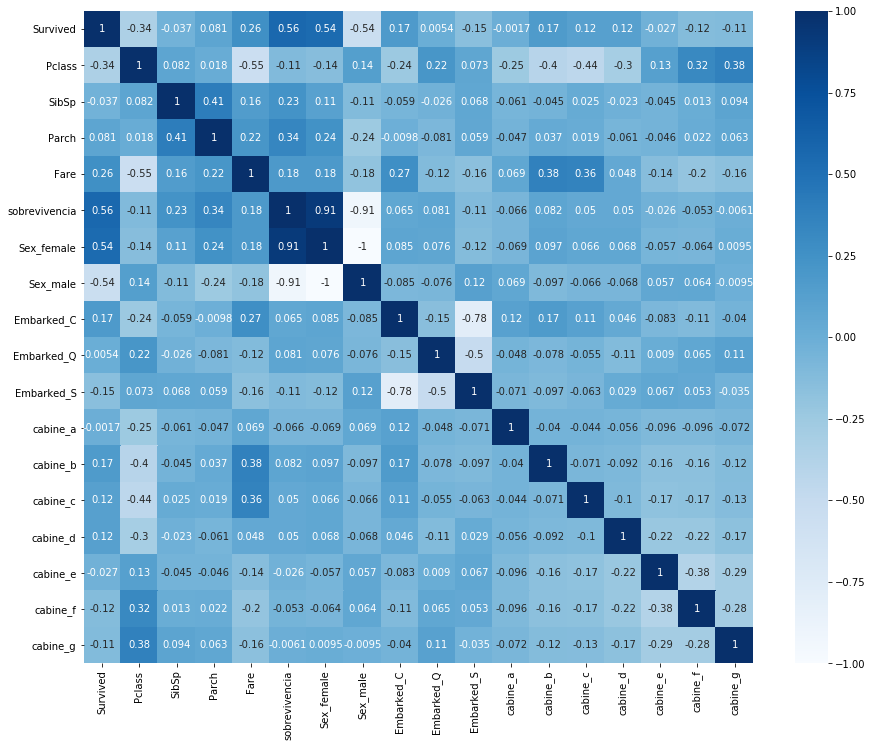

In [64]:
plt.subplots(figsize=(15, 12))
sns.heatmap(train.corr(), annot=True, cmap="Blues")

In [65]:
X_scale = preprocessing.scale(X)

In [66]:
valores_C=np.array([0.01, 0.1, 0.5, 1, 2, 3, 5, 10, 20, 50, 100])
regularizacao = ['l1', 'l2']
valores_grid = {"C":valores_C, "penalty":regularizacao}

In [67]:
modelo = LogisticRegression(solver='liblinear')

In [68]:
rfe = RFE(modelo, step=1).fit(X_scale, y)

In [72]:
rfe.support_

array([ True,  True,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False,  True, False,  True])

In [73]:
grid_reg_log = GridSearchCV(estimator=modelo, param_grid=valores_grid, cv=10)

In [74]:
grid_reg_log.fit(X_scale,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 5.e-01, 1.e+00, 2.e+00, 3.e+00, 5.e+00, 1.e+01,
       2.e+01, 5.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [75]:
print(grid_reg_log.best_score_)
print(grid_reg_log.best_estimator_.C)
print(grid_reg_log.best_estimator_.penalty)

0.8222803881511747
1.0
l1


In [76]:
metodo = ["gini", "entropy"]
max_depth = [1,2,3,4,5]
valores = {"criterion":metodo, "max_depth":max_depth}

In [77]:
tree = DecisionTreeClassifier()

In [78]:
grid_reg_tree = GridSearchCV(estimator=tree, param_grid=valores)

In [79]:
grid_reg_tree.fit(X_scale,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [80]:
print ("Melhor Score arvore de decisão:", grid_reg_tree.best_score_)
print ("Melhor critério:", grid_reg_tree.best_estimator_.criterion)
print ("Melhor Limite de profundidade da arvore:", grid_reg_tree.best_estimator_.max_depth)

Melhor Score arvore de decisão: 0.8267270159219311
Melhor critério: entropy
Melhor Limite de profundidade da arvore: 3


In [ ]:
modelolog = LogisticRegression(penalty='l1', C=1, solver='liblinear')

In [ ]:
modelolog.fit(X,y)

In [ ]:
y_pred = modelolog.predict(teste)

In [ ]:
y_pred